In [1]:
#Importing dataset
import pandas as pd
df = pd.read_csv('dataset1.csv')

In [2]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Check for missing values 
missing_values = df.isnull().sum()
print(missing_values)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [4]:
# Create new feature Power and Temperature difference
df['Power[W]'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']*0.104719755

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Power[W]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,6951.590552
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,6826.722716
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,7749.387534
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,5927.504652
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,5897.816602


In [6]:
#Rearranging the dataset
target_vars = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
new_features = ['Power[W]']

other_features = [col for col in df.columns if col not in target_vars + new_features]

ordered_columns = other_features + new_features + target_vars
df = df.reindex(columns=ordered_columns)

In [7]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power[W],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,6951.590552,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,6826.722716,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,7749.387534,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,5927.504652,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,5897.816602,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,6252.554772,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,6917.703239,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,6428.264049,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,4992.639983,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,5104.878617,0,0,0,0,0,0


In [8]:
# Summary statistics for the new features
print(df[['Power[W]']].describe())

           Power[W]
count  10000.000000
mean    6279.744946
std     1067.418294
min     1148.440609
25%     5561.184477
50%     6271.027336
75%     7003.002716
max    10469.922993


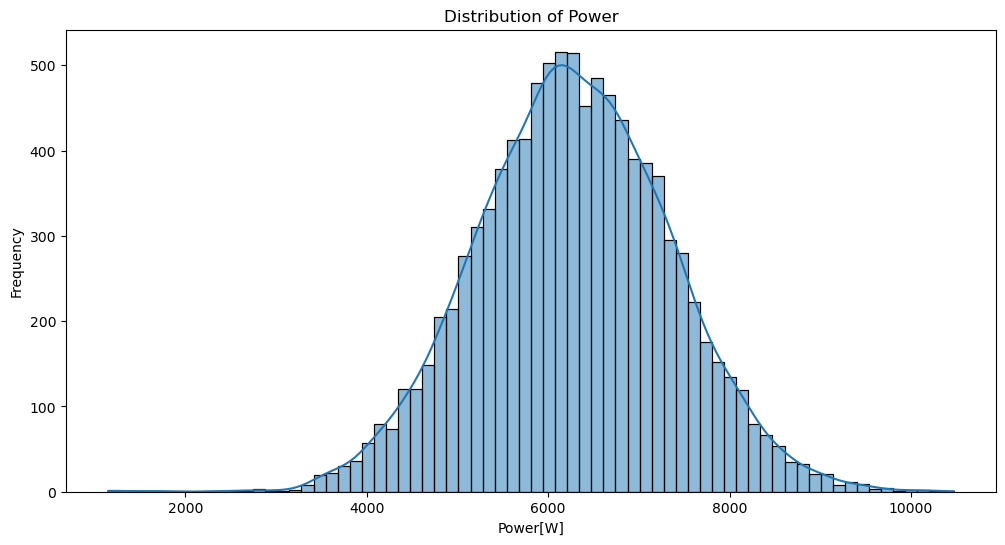

In [9]:
#Numeric distribution of new feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Power[W]'], kde=True)
plt.title('Distribution of Power')
plt.xlabel('Power[W]')
plt.ylabel('Frequency')
plt.show()



C:\Users\nafih\AppData\Local\Temp\ipykernel_18372\3935781857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


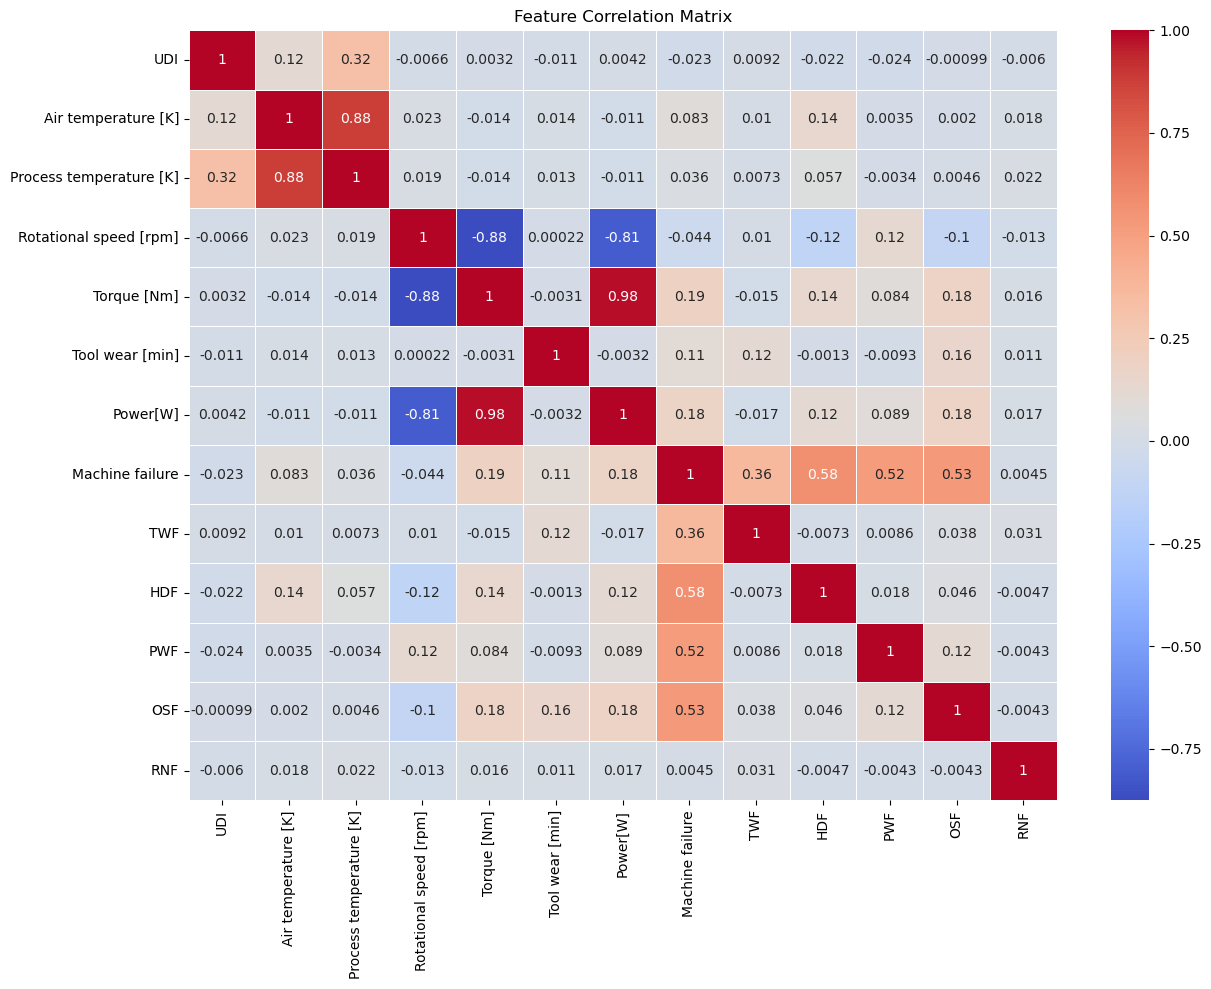

Power[W]    0.176039
Name: Machine failure, dtype: float64


In [10]:
# Correlation matrix including new features and target variable
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Specifically check the correlation of Power and Temperature difference with Machine failure
print(correlation_matrix[['Power[W]']].loc['Machine failure'])


In [11]:
#Standardizing the numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Power[W]']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power[W],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.629443,0,0,0,0,0,0
1,2,L47181,L,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.512456,0,0,0,0,0,0
2,3,L47182,L,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,1.376889,0,0,0,0,0,0
3,4,L47183,L,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.330009,0,0,0,0,0,0
4,5,L47184,L,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.357824,0,0,0,0,0,0
5,6,M14865,M,-0.952389,-0.947360,-0.634645,0.191915,-1.523166,-0.025474,0,0,0,0,0,0
6,7,L47186,L,-0.952389,-0.947360,0.107231,0.242073,-1.476034,0.597695,0,0,0,0,0,0
7,8,L47187,L,-0.952389,-0.947360,-0.065687,0.021376,-1.444613,0.139146,0,0,0,0,0,0
8,9,M14868,M,-0.852397,-0.879959,0.715235,-1.142297,-1.413191,-1.205872,0,0,0,0,0,0
9,10,M14869,M,-0.752405,-0.677756,1.128009,-1.202487,-1.366059,-1.100717,0,0,0,0,0,0


In [12]:
# Define the mapping for label encoding
label_map = {'L': 0, 'M': 1, 'H': 2}

# Apply the mapping to the 'Type' column
df['Type'] = df['Type'].map(label_map)

# Check the first 10 rows to ensure the encoding has been applied correctly
df.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power[W],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.629443,0,0,0,0,0,0
1,2,L47181,0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.512456,0,0,0,0,0,0
2,3,L47182,0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,1.376889,0,0,0,0,0,0
3,4,L47183,0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.330009,0,0,0,0,0,0
4,5,L47184,0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.357824,0,0,0,0,0,0
5,6,M14865,1,-0.952389,-0.947360,-0.634645,0.191915,-1.523166,-0.025474,0,0,0,0,0,0
6,7,L47186,0,-0.952389,-0.947360,0.107231,0.242073,-1.476034,0.597695,0,0,0,0,0,0
7,8,L47187,0,-0.952389,-0.947360,-0.065687,0.021376,-1.444613,0.139146,0,0,0,0,0,0
8,9,M14868,1,-0.852397,-0.879959,0.715235,-1.142297,-1.413191,-1.205872,0,0,0,0,0,0
9,10,M14869,1,-0.752405,-0.677756,1.128009,-1.202487,-1.366059,-1.100717,0,0,0,0,0,0


In [13]:
#Removing unwanted features
df = df.drop(columns=['UDI', 'Product ID'])
df.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power[W],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.629443,0,0,0,0,0,0
1,0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.512456,0,0,0,0,0,0
2,0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,1.376889,0,0,0,0,0,0
3,0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.330009,0,0,0,0,0,0
4,0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.357824,0,0,0,0,0,0
5,1,-0.952389,-0.947360,-0.634645,0.191915,-1.523166,-0.025474,0,0,0,0,0,0
6,0,-0.952389,-0.947360,0.107231,0.242073,-1.476034,0.597695,0,0,0,0,0,0
7,0,-0.952389,-0.947360,-0.065687,0.021376,-1.444613,0.139146,0,0,0,0,0,0
8,1,-0.852397,-0.879959,0.715235,-1.142297,-1.413191,-1.205872,0,0,0,0,0,0
9,1,-0.752405,-0.677756,1.128009,-1.202487,-1.366059,-1.100717,0,0,0,0,0,0


In [14]:
#removing outliers using IQR method
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[feature] <= lower_bound) | (df[feature] >= upper_bound)]
        if not outliers.empty:
            df.drop(outliers.index, inplace=True)
    return df

df_cleaned = remove_outliers_iqr(df, numerical_features)
df.shape
#print(f"Shape after IQR outlier removal: {df_cleaned.shape}")


(9520, 13)

In [15]:
from sklearn.neighbors import LocalOutlierFactor

def remove_outliers_lof(df, features, contamination=0.01):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    y_pred = lof.fit_predict(df[features])
    outliers = df[y_pred == -1]
    if not outliers.empty:
        df.drop(outliers.index, inplace=True)
    return df

# Applying LOF method to remove outliers
df_cleaned = remove_outliers_lof(df_cleaned , numerical_features)

df_cleaned .shape


(9424, 13)

In [16]:
df.to_csv('preprocessed_dataset.csv', index=False)